In [1048]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler , MinMaxScaler

In [1050]:
df =pd.read_csv("train.csv")

In [1052]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [1053]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [1054]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 

## Technique - 1 : Handle Missing Data

In [1057]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### TYPE - 1 : Remove Missing values

In [1059]:
df.shape

(891, 12)

In [1060]:
df.dropna().shape

(183, 12)

In [1061]:
df.dropna(axis=1).shape #column - axis - 1

(891, 9)

### TYPE - 2 : Mean Imputation for Normally Distributed data

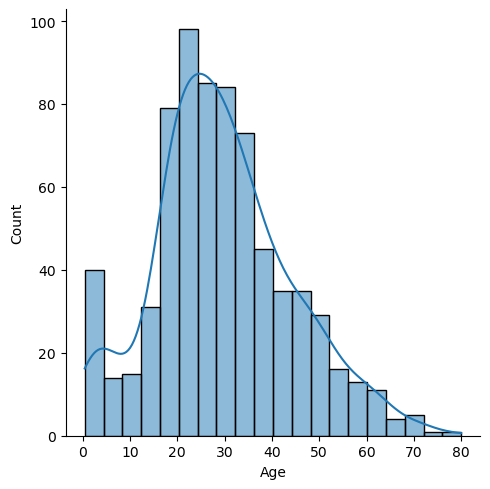

In [1063]:
sns.displot(df['Age'],kde=True)

In [1064]:
df['Age'].mean().round()

30.0

use this methos if your data has  normal distribution 

In [1066]:
df['Age'].fillna(30 , inplace=True)
df['Age'].isna().sum()

C:\Users\DELL 4\AppData\Local\Temp\ipykernel_6952\1854656243.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(30 , inplace=True)


0

### TYPE - 2 Median Imputation for dataset with outliers  

if your data is not normally distributed we have to find median and fill na with median values

In [1069]:
df['Age'].median()

30.0

### TYPE - 3 : Mode Imputation for Categorical Values 

we have to fill na by using mode method - frequently used methods

In [1072]:
df['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [1073]:
df['Embarked'].fillna('S',inplace=True)

C:\Users\DELL 4\AppData\Local\Temp\ipykernel_6952\3895404187.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna('S',inplace=True)


In [1074]:
df['Embarked'].isna().sum()

0

### TYPE - 4 : Random Sampling Imputation

In [1076]:
df['Age'][0]

22.0

In [1077]:
df['Age'].fillna(df['Age'][0])

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    30.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

###  TYPE - 5 Arbitary Imputation 

we have to fillna by our own 

In [1080]:
df['Age'].fillna(60)

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    30.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

## Technique - 2 Handle Imbalanced Dataset

first find how datas are distributed

In [1083]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

**Class 0 - 61 & Class 1 - 38 %**

**Upsampling**

In [1086]:
df_minority = df[df['Survived'] == 1]
df_majority = df[df['Survived'] == 0]

In [1087]:
upsampled_df = resample(df_minority,n_samples=len(df_majority),replace=True,random_state=42)

In [1088]:
upsampled_df.shape

(549, 12)

In [1089]:
actual_df=pd.concat((df_majority,upsampled_df))

In [1090]:
actual_df['Survived'].value_counts()

Survived
0    549
1    549
Name: count, dtype: int64

**Downsampling**

In [1092]:
downsampled_df=resample(df_majority,n_samples=len(df_minority),replace=False,random_state=42)

In [1093]:
downsampled_df.shape

(342, 12)

In [1094]:
actual_df=pd.concat((df_minority,downsampled_df))

In [1095]:
actual_df['Survived'].value_counts()

Survived
1    342
0    342
Name: count, dtype: int64

### Synthetic Minority Oversampling technique (SMOTE) 

In [1097]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Ideal world not text column occur wee converted into numbers and then we use

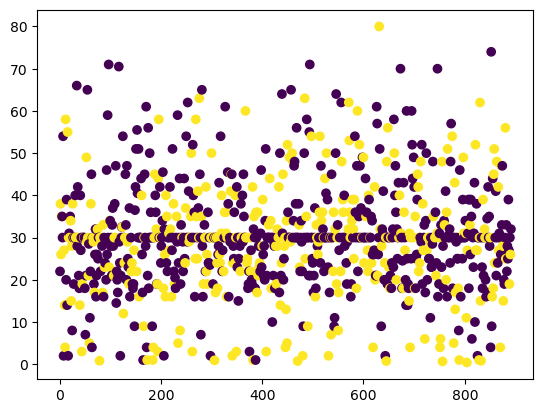

In [1099]:
plt.scatter(df['PassengerId'],df['Age'],c=df['Survived'])

In [1100]:
df.shape

(891, 12)

In [1101]:
smote=SMOTE()

In [1102]:
x,y=smote.fit_resample(df[['PassengerId','Age']],df['Survived'])

In [1103]:
x

,PassengerId,Age
0,1,22.000000
1,2,38.000000
2,3,26.000000
3,4,35.000000
4,5,35.000000
...,...,...
1093,131,21.946968
1094,515,52.807576
1095,31,30.158214
1096,444,28.189790


In [1104]:
y

0       0
1       1
2       1
3       1
4       0
       ..
1093    1
1094    1
1095    1
1096    1
1097    1
Name: Survived, Length: 1098, dtype: int64

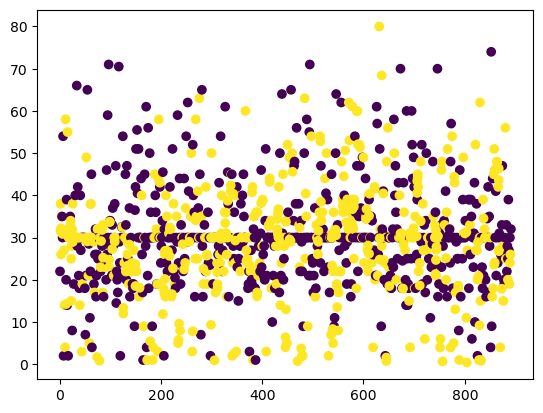

In [1105]:
plt.scatter(x['PassengerId'],x['Age'],c=y)

## Handle Outliers 

**5 number summary**

In [1108]:
Q1= np.quantile(df['Age'],.25)
Q2=np.quantile(df['Age'],.50)
Q3=np.quantile(df['Age'],.75)

In [1109]:
IQR =Q3- Q1

In [1110]:
IQR

13.0

In [1111]:
lowerfence = Q1 - (1.5 * IQR)
upperfence = Q3 + (1.5 * IQR)

In [1112]:
lowerfence , upperfence

(2.5, 54.5)

In [1113]:
outliers = []

for i in df['Age']:
    if i < lowerfence or i > upperfence:
        outliers.append(i)

In [1114]:
len(outliers)

66

removing outliers depends upon what model we are going to use , some model does not need like decision tree, random forest

<Axes: ylabel='Age'>

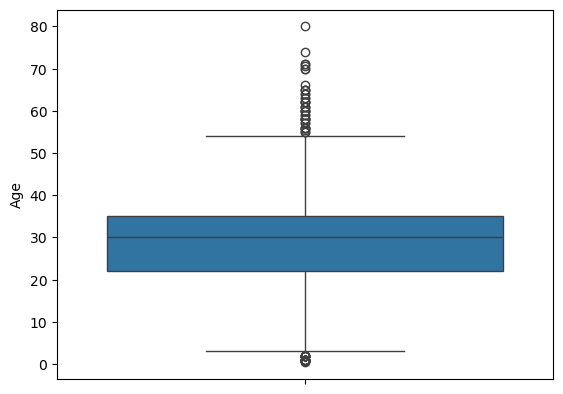

In [1116]:
sns.boxplot(df['Age'])

### Technique - 4 : Data Encoding

In [1118]:
columns = ['Pclass','Sex','Embarked']

In [1119]:
for column in columns:
    print(column)
    print(df[column].unique())

Pclass
[3 1 2]
Sex
['male' 'female']
Embarked
['S' 'C' 'Q']


### Nominal or One Hot Encoding 

In [1121]:
onehotencoder = OneHotEncoder()

In [1122]:
sex_encoded=onehotencoder.fit_transform(df[['Sex']]).toarray()

In [1123]:
sex_encoded

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [1124]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1126]:
sex_encoded_df = pd.DataFrame(sex_encoded,columns=onehotencoder.get_feature_names_out())

In [1127]:
sex_encoded_df

,Sex_female,Sex_male
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0
...,...,...
886,0.0,1.0
887,1.0,0.0
888,1.0,0.0
889,0.0,1.0


### Label Encoding 

In [1129]:
labelencoder=LabelEncoder()

In [1130]:
sex_encoded = labelencoder.fit_transform(df[['Sex']])

C:\Users\DELL 4\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [1131]:
sex_encoded_df = pd.DataFrame(sex_encoded,columns=['sex_label_encoded'])

In [1132]:
sex_encoded_df

,sex_label_encoded
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


### Ordinal Encoding

In [1134]:
from sklearn.preprocessing import OrdinalEncoder

In [1135]:
oridinalencoder=OrdinalEncoder(categories = [['male','female']])

In [1136]:
sex_encoded = oridinalencoder.fit_transform(df[['Sex']])

In [1137]:
sex_encoded_df = pd.DataFrame(sex_encoded,columns=['sex_ordinal_encoded'])

In [1138]:
new_df=pd.concat([df,sex_encoded_df],axis=1)

## Technique - 5 : Feature Scaling - Normalization / Standardisation 

In [1140]:
new_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex_ordinal_encoded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23.4500,NaN,S,1.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0.0


In [1141]:
new_df = new_df.drop(['Name','Ticket','Cabin','Sex','Embarked'],axis=1)

In [1225]:
scaler = StandardScaler()

In [1229]:
scaled_data =scaler.fit_transform(new_df)

In [1231]:
scaled_data.shape

(891, 8)

In [1233]:
scaler = MinMaxScaler()

In [1235]:
scaled_data =scaler.fit_transform(new_df)

In [1237]:
scaled_data.shape

(891, 8)